# Hackaton Prédiction - JO 2024

In [2]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

import os
from dotenv import load_dotenv
from pathlib import Path
from sqlalchemy import create_engine

# Chemin relatif vers le fichier .env
env_path = Path('../../.env')
load_dotenv(dotenv_path=env_path)

DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_DATABASE = os.getenv("DB_DATABASE")

# Paramètres de la base de données PostgreSQL
DATABASE_URL = "mysql+pymysql://" + DB_USER + ":" + DB_PASSWORD + "@" + DB_HOST + "/" + DB_DATABASE
engine = create_engine(DATABASE_URL, echo=True)

# Pour tester la connexion
# connection = engine.connect()
# print("Connexion réussie!")

olympic_hosts = pd.read_sql("SELECT * FROM olympic_hosts", con=engine)
olympic_athlete = pd.read_sql("SELECT * FROM olympic_athletes", con=engine)
olympic_medals = pd.read_sql("SELECT * FROM olympic_medals", con=engine)
olympic_results = pd.read_sql("SELECT * FROM olympic_results", con=engine)

# Close the connection
# connection.close()
# print("Connexion fermée avec succès!")

2024-05-30 14:38:11,054 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-05-30 14:38:11,056 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-05-30 14:38:11,072 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-05-30 14:38:11,074 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-05-30 14:38:11,084 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-05-30 14:38:11,086 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-05-30 14:38:11,105 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-05-30 14:38:11,106 INFO sqlalchemy.engine.Engine [generated in 0.00112s] {'table_schema': 'kemeh32717_hackathon', 'table_name': 'SELECT * FROM olympic_hosts'}
2024-05-30 14:38:11,115 INFO sqlalchemy.engine.Engine SELECT * FROM olympic_hosts
2024-05-30 14:38:11,116 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-05-30 14:38:11,137 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM informatio

### ATHLETES - olympic_athletes.json

In [3]:
# Afficher les premières lignes du DataFrame
olympic_athlete.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio


In [4]:
# Combien de lignes ? Combien de colonnes ?
print('Il y a ' + str(olympic_athlete.shape[0]) + ' lignes et ' + str(olympic_athlete.shape[1]) + ' colonnes')

Il y a 0 lignes et 7 colonnes


In [5]:
olympic_athlete.isnull().sum()

athlete_url             0.0
athlete_full_name       0.0
games_participations    0.0
first_game              0.0
athlete_year_birth      0.0
athlete_medals          0.0
bio                     0.0
dtype: float64

In [6]:
# Y a-t'il des lignes dupliquée ? Si oui, les supprimer
print('Il y a ' + str(olympic_athlete.duplicated().sum()) + ' ligne(s) dupliquée(s)')

Il y a 0 ligne(s) dupliquée(s)


### Résultats - olympic_results.html

In [7]:
# Renommer la colonne 'slug_game' en 'game_slug'
olympic_results = olympic_results.rename({'slug_game':'game_slug'},axis=1)

# Afficher la première table (si le fichier contient plusieurs tables)
olympic_results.head()

,discipline_title,event_title,game_slug,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",0,1,Italy,IT,ITA,,,,
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",0,2,Norway,NO,NOR,,,,
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",0,3,Sweden,SE,SWE,,,,
3,Curling,Mixed Doubles,beijing-2022,GameTeam,AUCUNE,"[('Jennifer DODDS', 'https://olympics.com/en/a...",0,4,Great Britain,GB,GBR,,,,
4,Curling,Mixed Doubles,beijing-2022,GameTeam,AUCUNE,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",0,5,Canada,CA,CAN,,,,


In [8]:
# Combien de lignes ? Combien de colonnes ?
print('Il y a ' + str(olympic_results.shape[0]) + ' lignes et ' + str(olympic_results.shape[1]) + ' colonnes')

Il y a 162804 lignes et 15 colonnes


In [9]:
# Afficher le nombre de données manquantes pour chaque colonne
olympic_results.isnull().sum()

discipline_title         0
event_title              0
game_slug                0
participant_type         0
medal_type               0
athletes                 0
rank_equal               0
rank_position            0
country_name             0
country_code             0
country_3_letter_code    0
athlete_url              0
athlete_full_name        0
value_unit               0
value_type               0
dtype: int64

In [10]:
# Y a-t'il des lignes dupliquée ? Si oui, les supprimer
print('Il y a ' + str(olympic_results.duplicated().sum()) + ' ligne(s) dupliquée(s)')

Il y a 6351 ligne(s) dupliquée(s)


### Médailles - olympic_medals.xlsx

In [11]:
# Renommer la colonne 'slug_game' en 'game_slug'
olympic_medals = olympic_medals.rename({'slug_game':'game_slug'},axis=1)

# Afficher les premières lignes du DataFrame
olympic_medals.head()

,id,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,21698,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,21699,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,21700,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,21701,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,21702,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [12]:
# Combien de lignes ? Combien de colonnes ?
print('Il y a ' + str(olympic_medals.shape[0]) + ' lignes et ' + str(olympic_medals.shape[1]) + ' colonnes')

Il y a 21697 lignes et 13 colonnes


In [13]:
# Afficher le nombre de données manquantes pour chaque colonne
olympic_medals.isnull().sum()

id                          0
discipline_title            0
game_slug                   0
event_title                 0
event_gender                0
medal_type                  0
participant_type            0
participant_title           0
athlete_url              4670
athlete_full_name        3624
country_name                0
country_code             1502
country_3_letter_code       0
dtype: int64

In [14]:
# Y a-t'il des lignes dupliquée ? Si oui, les supprimer
print('Il y a ' + str(olympic_medals.duplicated().sum()) + ' ligne(s) dupliquée(s)')

Il y a 0 ligne(s) dupliquée(s)


In [15]:
# On renomme la colonne slug_game en game_slug pour les futures merges des autres DF
olympic_medals = olympic_medals.rename({'slug_game':'game_slug'},axis=1)
olympic_medals.columns

Index(['id', 'discipline_title', 'game_slug', 'event_title', 'event_gender',
       'medal_type', 'participant_type', 'participant_title', 'athlete_url',
       'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')

In [16]:
olympic_medals.tail()

,id,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
21692,43390,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,Denmark,https://olympics.com/en/athletes/viggo-jensen,Viggo JENSEN,Denmark,DK,DEN
21693,43391,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,Greece,None,Alexandros Nikolopoulos,Greece,GR,GRE
21694,43392,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,Denmark,https://olympics.com/en/athletes/viggo-jensen,Viggo JENSEN,Denmark,DK,DEN
21695,43393,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,Great Britain,https://olympics.com/en/athletes/launceston-el...,Launceston ELLIOT,Great Britain,GB,GBR
21696,43394,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,BRONZE,Athlete,Greece,https://olympics.com/en/athletes/sotirios-versis,Sotirios VERSIS,Greece,GR,GRE


### Hôtes - olympic_hosts.xml

In [17]:
# Afficher les premières lignes du DataFrame
olympic_hosts.head()

,id,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,83,tokyo-2020,2021-08-08 14:00:00,2021-07-23 11:00:00,Japan,Tokyo 2020,Summer,2020
1,84,rio-2016,2016-08-21 21:00:00,2016-08-05 12:00:00,Brazil,Rio 2016,Summer,2016
2,85,london-2012,2012-08-12 19:00:00,2012-07-27 07:00:00,Great Britain,London 2012,Summer,2012
3,86,beijing-2008,2008-08-24 12:00:00,2008-08-08 00:00:00,China,Beijing 2008,Summer,2008
4,87,athens-2004,2004-08-29 18:00:00,2004-08-13 06:00:00,Greece,Athens 2004,Summer,2004


In [18]:
# Combien de lignes ? Combien de colonnes ?
print('Il y a ' + str(olympic_hosts.shape[0]) + ' lignes et ' + str(olympic_hosts.shape[1]) + ' colonnes')

Il y a 29 lignes et 8 colonnes


In [19]:
# Afficher le nombre de données manquantes pour chaque colonne
olympic_hosts.isnull().sum()

id                 0
game_slug          0
game_end_date      0
game_start_date    0
game_location      0
game_name          0
game_season        0
game_year          0
dtype: int64

In [20]:
# Y a-t'il des lignes dupliquée ? Si oui, les supprimer
print('Il y a ' + str(olympic_hosts.duplicated().sum()) + ' ligne(s) dupliquée(s)')

Il y a 0 ligne(s) dupliquée(s)


# Machine Learning

#### Préparation des données générales pour les prédictions des JO d'été 2024 (on utilisera le DF results plutôt que medals car plus de résultats)

In [21]:
# Imports

from sklearn.model_selection import train_test_split # Pour diviser le dataset en training et testing
from sklearn.metrics import mean_squared_error, r2_score # Pour évaluer les performances du modèle
from sklearn.linear_model import LinearRegression # Pour la régression linéaire
from sklearn.ensemble import RandomForestRegressor # Pour le random forest
from sklearn.svm import SVR # Pour le support vector regression

import matplotlib.pyplot as plt # Pour les visualisations

In [22]:
# Fusionner les DataFrames sur la colonne 'slug_game'
olympic_data = olympic_results.merge(olympic_hosts, left_on='game_slug', right_on='game_slug')

In [23]:
# Trie en BDD sur les jeux d'été (summer) déjà effectué
summer_olympics = olympic_data

### Nombre de médaille d’Or, d’Argent et de Bronze qui seront gagné par la France ?

In [24]:
summer_olympics.head()

,discipline_title,event_title,game_slug,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,athlete_full_name,value_unit,value_type,id,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,GOLD,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",0,1,Spain,ES,...,,,,83,2021-08-08 14:00:00,2021-07-23 11:00:00,Japan,Tokyo 2020,Summer,2020
1,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,SILVER,"[('Alessandra PERILLI', 'https://olympics.com/...",0,2,San Marino,SM,...,,,,83,2021-08-08 14:00:00,2021-07-23 11:00:00,Japan,Tokyo 2020,Summer,2020
2,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,BRONZE,"[('Madelynn Ann BERNAU', 'https://olympics.com...",0,3,United States of America,US,...,,,,83,2021-08-08 14:00:00,2021-07-23 11:00:00,Japan,Tokyo 2020,Summer,2020
3,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,AUCUNE,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",0,4,Slovakia,SK,...,,,,83,2021-08-08 14:00:00,2021-07-23 11:00:00,Japan,Tokyo 2020,Summer,2020
4,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,AUCUNE,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",0,5,Japan,JP,...,,,,83,2021-08-08 14:00:00,2021-07-23 11:00:00,Japan,Tokyo 2020,Summer,2020


#### Préparation des données

In [25]:
# Filtrer pour les médailles remportées par la France
france_medals = summer_olympics[summer_olympics['country_name'] == 'France']

# Garder uniquement les colonnes pertinentes
france_medals = france_medals[['discipline_title', 'event_title', 'game_slug', 'medal_type', 'game_year']]

# On supprimer les lignes où la colonne 'game_year' est égale à 0
france_medals = france_medals[france_medals['game_year'] != 0]

In [26]:
france_medals

,discipline_title,event_title,game_slug,medal_type,game_year
46,Shooting,50m Rifle 3 Positions women,tokyo-2020,AUCUNE,2020
94,Shooting,25m Rapid Fire Pistol Men,tokyo-2020,GOLD,2020
113,Shooting,25m Rapid Fire Pistol Men,tokyo-2020,AUCUNE,2020
166,Shooting,10m Air Rifle women,tokyo-2020,AUCUNE,2020
250,Shooting,Skeet women,tokyo-2020,AUCUNE,2020
...,...,...,...,...,...
115189,Boxing,5262kg bantamweight men,london-1908,AUCUNE,1908
115190,Boxing,5262kg bantamweight men,london-1908,AUCUNE,1908
115197,Boxing,7167kg heavyweight men,london-1908,AUCUNE,1908
115214,Hockey,hockey men,london-1908,AUCUNE,1908


#### Agrégation des données

In [27]:
# Garder uniquement les médailles de type 'GOLD', 'SILVER' et 'BRONZE'
medals = france_medals[france_medals['medal_type'].isin(['GOLD', 'SILVER', 'BRONZE'])]

# Aggrégation des médailles par année
medals_aggregated = medals.groupby(['game_year', 'medal_type']).size().unstack(fill_value=0).reset_index()

# Renommer les colonnes
X = medals_aggregated[['game_year']]
y_gold = medals_aggregated['GOLD']
y_silver = medals_aggregated['SILVER']
y_bronze = medals_aggregated['BRONZE']

X_train, X_test, y_train_gold, y_test_gold = train_test_split(X, y_gold, test_size=0.2, random_state=42)
_, _, y_train_silver, y_test_silver = train_test_split(X, y_silver, test_size=0.2, random_state=42)
_, _, y_train_bronze, y_test_bronze = train_test_split(X, y_bronze, test_size=0.2, random_state=42)

#### Modélisation et entrainement

###### Modèle de Régression Linéaire

In [28]:
# Initalisation des modèles
model_gold = LinearRegression()
model_silver = LinearRegression()
model_bronze = LinearRegression()

# Entraînement des modèles
model_gold.fit(X_train, y_train_gold)
model_silver.fit(X_train, y_train_silver)
model_bronze.fit(X_train, y_train_bronze)

# Prédiction des médailles
y_pred_gold = model_gold.predict(X_test)
y_pred_silver = model_silver.predict(X_test)
y_pred_bronze = model_bronze.predict(X_test)

# Calcul des métriques
mse_gold = mean_squared_error(y_test_gold, y_pred_gold)
r2_gold = r2_score(y_test_gold, y_pred_gold)

mse_silver = mean_squared_error(y_test_silver, y_pred_silver)
r2_silver = r2_score(y_test_silver, y_pred_silver)

mse_bronze = mean_squared_error(y_test_bronze, y_pred_bronze)
r2_bronze = r2_score(y_test_bronze, y_pred_bronze)

mse_gold, r2_gold, mse_silver, r2_silver, mse_bronze, r2_bronze



(21.780093545424425,
 0.05872344821695141,
 22.340198029615877,
 -0.20396276806313107,
 18.035384408946957,
 0.09319296267864463)

###### Modèle Random Forest

In [29]:
# Initalisation des modèles
rf_model_gold = RandomForestRegressor(random_state=42)
rf_model_silver = RandomForestRegressor(random_state=42)
rf_model_bronze = RandomForestRegressor(random_state=42)

# Entraînement des modèles
rf_model_gold.fit(X_train, y_train_gold)
rf_model_silver.fit(X_train, y_train_silver)
rf_model_bronze.fit(X_train, y_train_bronze)

# Prédiction des médailles
y_pred_rf_gold = rf_model_gold.predict(X_test)
y_pred_rf_silver = rf_model_silver.predict(X_test)
y_pred_rf_bronze = rf_model_bronze.predict(X_test)

# Evaluation des modèles
mse_rf_gold = mean_squared_error(y_test_gold, y_pred_rf_gold)
r2_rf_gold = r2_score(y_test_gold, y_pred_rf_gold)

mse_rf_silver = mean_squared_error(y_test_silver, y_pred_rf_silver)
r2_rf_silver = r2_score(y_test_silver, y_pred_rf_silver)

mse_rf_bronze = mean_squared_error(y_test_bronze, y_pred_rf_bronze)
r2_rf_bronze = r2_score(y_test_bronze, y_pred_rf_bronze)

mse_rf_gold, r2_rf_gold, mse_rf_silver, r2_rf_silver, mse_rf_bronze, r2_rf_bronze


(16.527283333333333,
 0.28573565426170466,
 14.734050000000002,
 0.20594940119760485,
 22.96618333333333,
 -0.1547243016759774)

###### Modèle SVM


In [30]:
# Initialisation des modèles
svm_model_gold = SVR()
svm_model_silver = SVR()
svm_model_bronze = SVR()

# Entraînement des modèles
svm_model_gold.fit(X_train, y_train_gold)
svm_model_silver.fit(X_train, y_train_silver)
svm_model_bronze.fit(X_train, y_train_bronze)

# Prédiction des médailles
y_pred_svm_gold = svm_model_gold.predict(X_test)
y_pred_svm_silver = svm_model_silver.predict(X_test)
y_pred_svm_bronze = svm_model_bronze.predict(X_test)

# Evaluation des modèles
mse_svm_gold = mean_squared_error(y_test_gold, y_pred_svm_gold)
r2_svm_gold = r2_score(y_test_gold, y_pred_svm_gold)

mse_svm_silver = mean_squared_error(y_test_silver, y_pred_svm_silver)
r2_svm_silver = r2_score(y_test_silver, y_pred_svm_silver)

mse_svm_bronze = mean_squared_error(y_test_bronze, y_pred_svm_bronze)
r2_svm_bronze = r2_score(y_test_bronze, y_pred_svm_bronze)

mse_svm_gold, r2_svm_gold, mse_svm_silver, r2_svm_silver, mse_svm_bronze, r2_svm_bronze


(19.439343551473485,
 0.15988431230126587,
 12.050167180990842,
 0.35058979264121215,
 23.825151300288805,
 -0.19791263521005154)

#### Prédicition

In [31]:
# Année 2024
year_2024 = pd.DataFrame({'game_year': [2024]})

# Linear Regression
pred_gold_2024 = model_gold.predict(year_2024)
pred_silver_2024 = model_silver.predict(year_2024)
pred_bronze_2024 = model_bronze.predict(year_2024)

# Random Forest
pred_rf_gold_2024 = rf_model_gold.predict(year_2024)
pred_rf_silver_2024 = rf_model_silver.predict(year_2024)
pred_rf_bronze_2024 = rf_model_bronze.predict(year_2024)

# SVM
pred_svm_gold_2024 = svm_model_gold.predict(year_2024)
pred_svm_silver_2024 = svm_model_silver.predict(year_2024)
pred_svm_bronze_2024 = svm_model_bronze.predict(year_2024)

# Return the predictions
# (pred_gold_2024[0], pred_silver_2024[0], pred_bronze_2024[0],
#  pred_rf_gold_2024[0], pred_rf_silver_2024[0], pred_rf_bronze_2024[0],
#  pred_svm_gold_2024[0], pred_svm_silver_2024[0], pred_svm_bronze_2024[0])


#### Prédiction pour les JO 2024

In [32]:
# Linear Regression Predictions
print(f"Linear Regression - Gold: {pred_gold_2024[0]}, Silver: {pred_silver_2024[0]}, Bronze: {pred_bronze_2024[0]}")

# Random Forest Predictions
print(f"Random Forest - Gold: {pred_rf_gold_2024[0]}, Silver: {pred_rf_silver_2024[0]}, Bronze: {pred_rf_bronze_2024[0]}")

# SVM Predictions
print(f"SVM - Gold: {pred_svm_gold_2024[0]}, Silver: {pred_svm_silver_2024[0]}, Bronze: {pred_svm_bronze_2024[0]}")


Linear Regression - Gold: 8.27437106918239, Silver: 9.546776729559753, Bronze: 13.611803683737662
Random Forest - Gold: 9.98, Silver: 13.28, Bronze: 12.25
SVM - Gold: 9.85633093497508, Silver: 9.489464675820072, Bronze: 11.905393389878533


### Le nombre de médaille d’Or, d’Argent et de Bronze qui seront gagnés par le Top 25 des pays participants ?

In [33]:
# Agréger les données pour obtenir le nombre de médailles par pays et par année
medals_by_country = summer_olympics.groupby(['country_name', 'medal_type']).size().unstack(fill_value=0)

# Supprimer les pays qui n'existent plus / ne participent plus
medals_by_country = medals_by_country.drop(['Soviet Union', 'German Democratic Republic (Germany)'], errors='ignore')

# Calculer le nombre total de médailles uniquement pour les médailles d'or, d'argent et de bronze (pas ceux de la colonne 'AUCUNE')
medals_by_country['Total_Medals'] = medals_by_country['BRONZE'] + medals_by_country['GOLD'] + medals_by_country['SILVER']

# Trier et sélectionner les 25 premiers pays
top_25_countries = medals_by_country.sort_values('Total_Medals', ascending=False).head(25)

# Afficher les 25 premiers pays (en fonction du nombre total de médailles)
top_25_countries

medal_type,AUCUNE,BRONZE,GOLD,SILVER,Total_Medals
country_name,,,,,
United States of America,5964,737,1058,832,2627
Great Britain,4389,312,282,316,910
Germany,3138,277,225,257,759
France,4839,274,220,247,741
People's Republic of China,1795,173,262,199,634
Italy,3425,212,216,186,614
Australia,2935,209,164,173,546
Hungary,2865,175,181,153,509
Japan,2771,178,169,149,496


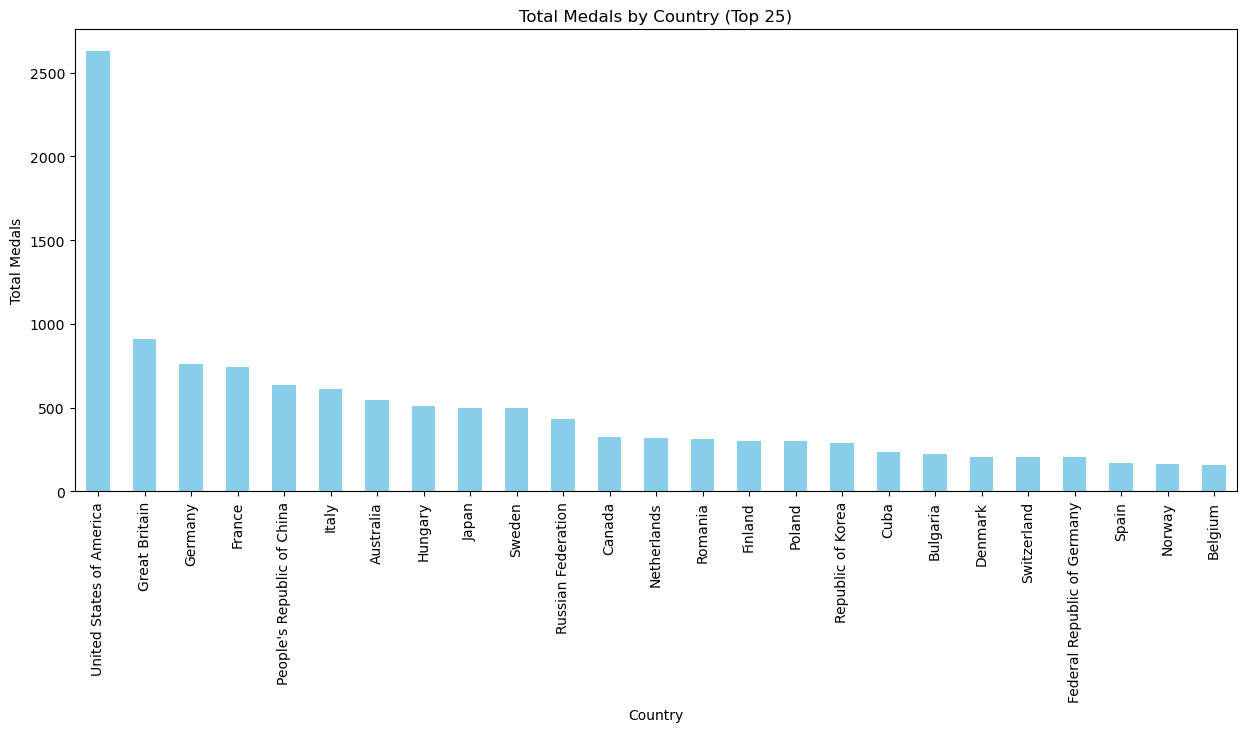

In [34]:
# Créer un graphique à barres pour les 25 premiers pays
top_25_countries .plot(kind='bar', y='Total_Medals', figsize=(15, 6), color='skyblue', legend=False)
plt.title('Total Medals by Country (Top 25)')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.show()

#### Agrégation des données

In [35]:
# Filtrer les données pour ne garder que les pays du Top 25
top_25_summer_olympics = summer_olympics[summer_olympics['country_name'].isin(top_25_countries.index)]

# Agréger les données pour obtenir le nombre de médailles par pays et par année
medals_by_year = top_25_summer_olympics.groupby(['game_year', 'country_name', 'medal_type']).size().unstack(fill_value=0).reset_index()

# Ajouter des colonnes pour les totaux de médailles
medals_by_year['Total'] = medals_by_year[['AUCUNE', 'GOLD', 'SILVER', 'BRONZE']].sum(axis=1)

# On supprimer les lignes où la colonne 'game_year' est égale à 0
medals_by_year = medals_by_year[medals_by_year['game_year'] != 0]

# On reset l'index
medals_by_year = medals_by_year.reset_index(drop=True)

# On renomme les colonnes
medals_by_year.columns = ['Year', 'Country', 'None', 'Gold', 'Silver', 'Bronze', 'Total']

# Afficher les premières lignes pour vérifier
top_25_data = medals_by_year
top_25_data

,Year,Country,None,Gold,Silver,Bronze,Total
0,1904,Australia,4,1,0,3,8
1,1904,Canada,14,1,4,1,20
2,1904,Cuba,1,0,3,0,4
3,1904,France,0,0,0,1,1
4,1904,Germany,46,6,4,5,61
...,...,...,...,...,...,...,...
553,2020,Romania,40,0,1,3,44
554,2020,Spain,142,6,3,8,159
555,2020,Sweden,66,0,3,6,75
556,2020,Switzerland,74,6,3,4,87


#### Préparration des données

In [36]:
# Préparation des données pour la modélisation
# On utilise les résultats des années précédentes pour prédire les médailles de l'année suivante
top_25_data['Next_Gold'] = top_25_data.groupby('Country')['Gold'].shift(-1)
top_25_data['Next_Silver'] = top_25_data.groupby('Country')['Silver'].shift(-1)
top_25_data['Next_Bronze'] = top_25_data.groupby('Country')['Bronze'].shift(-1)

# Suppression des lignes avec des valeurs manquantes
model_data = top_25_data.dropna()

# Séparation des caractéristiques et des cibles pour chaque type de médaille
X = model_data[['Year', 'Gold', 'Silver', 'Bronze']]
y_gold = model_data['Next_Gold']
y_silver = model_data['Next_Silver']
y_bronze = model_data['Next_Bronze']

# Division des données en ensembles d'entraînement et de test
X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(X, y_gold, test_size=0.2, random_state=42)
X_train_silver, X_test_silver, y_train_silver, y_test_silver = train_test_split(X, y_silver, test_size=0.2, random_state=42)
X_train_bronze, X_test_bronze, y_train_bronze, y_test_bronze = train_test_split(X, y_bronze, test_size=0.2, random_state=42)


#### Modélisation (3 modèles de machine learning)

In [37]:
# Modélisation et prédiction pour les médailles d'or
model_gold_lr = LinearRegression()
model_gold_lr.fit(X_train_gold, y_train_gold)
predictions_gold_lr = model_gold_lr.predict(X_test_gold)
mse_gold_lr = mean_squared_error(y_test_gold, predictions_gold_lr)

# Modélisation et prédiction pour les médailles d'argent
model_silver_lr = LinearRegression()
model_silver_lr.fit(X_train_silver, y_train_silver)
predictions_silver_lr = model_silver_lr.predict(X_test_silver)
mse_silver_lr = mean_squared_error(y_test_silver, predictions_silver_lr)

# Modélisation et prédiction pour les médailles de bronze
model_bronze_lr = LinearRegression()
model_bronze_lr.fit(X_train_bronze, y_train_bronze)
predictions_bronze_lr = model_bronze_lr.predict(X_test_bronze)
mse_bronze_lr = mean_squared_error(y_test_bronze, predictions_bronze_lr)


In [38]:
# Modèle Forêt Aléatoire pour les médailles d'or
model_gold_rf = RandomForestRegressor(random_state=42)
model_gold_rf.fit(X_train_gold, y_train_gold)
predictions_gold_rf = model_gold_rf.predict(X_test_gold)
mse_gold_rf = mean_squared_error(y_test_gold, predictions_gold_rf)

# Modèle Forêt Aléatoire pour les médailles d'argent
model_silver_rf = RandomForestRegressor(random_state=42)
model_silver_rf.fit(X_train_silver, y_train_silver)
predictions_silver_rf = model_silver_rf.predict(X_test_silver)
mse_silver_rf = mean_squared_error(y_test_silver, predictions_silver_rf)

# Modèle Forêt Aléatoire pour les médailles de bronze
model_bronze_rf = RandomForestRegressor(random_state=42)
model_bronze_rf.fit(X_train_bronze, y_train_bronze)
predictions_bronze_rf = model_bronze_rf.predict(X_test_bronze)
mse_bronze_rf = mean_squared_error(y_test_bronze, predictions_bronze_rf)


In [39]:
# Modèle SVR pour les médailles d'or
model_gold_svr = SVR()
model_gold_svr.fit(X_train_gold, y_train_gold)
predictions_gold_svr = model_gold_svr.predict(X_test_gold)
mse_gold_svr = mean_squared_error(y_test_gold, predictions_gold_svr)

# Modèle SVR pour les médailles d'argent
model_silver_svr = SVR()
model_silver_svr.fit(X_train_silver, y_train_silver)
predictions_silver_svr = model_silver_svr.predict(X_test_silver)
mse_silver_svr = mean_squared_error(y_test_silver, predictions_silver_svr)

# Modèle SVR pour les médailles de bronze
model_bronze_svr = SVR()
model_bronze_svr.fit(X_train_bronze, y_train_bronze)
predictions_bronze_svr = model_bronze_svr.predict(X_test_bronze)
mse_bronze_svr = mean_squared_error(y_test_bronze, predictions_bronze_svr)


Comparaison des MSE

In [40]:
mse_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVR'],
    'MSE_Gold': [mse_gold_lr, mse_gold_rf, mse_gold_svr],
    'MSE_Silver': [mse_silver_lr, mse_silver_rf, mse_silver_svr],
    'MSE_Bronze': [mse_bronze_lr, mse_bronze_rf, mse_bronze_svr]
})

# import ace_tools as tools; tools.display_dataframe_to_user(name="MSE Comparison", dataframe=mse_comparison)

# Affichage des MSE
mse_comparison


,Model,MSE_Gold,MSE_Silver,MSE_Bronze
0,Linear Regression,43.673117,42.314579,39.485150
1,Random Forest,21.497346,33.871471,22.571261
2,SVR,72.164823,92.384887,78.553138


#### Prédiction

In [41]:
# Prédictions pour 2024 avec Régression Linéaire
year_2024_data = top_25_data[top_25_data['Year'] == 2020].copy()
year_2024_data['Year'] = 2024

predictions_2024_lr_gold = model_gold_lr.predict(year_2024_data[['Year', 'Gold', 'Silver', 'Bronze']])
predictions_2024_lr_silver = model_silver_lr.predict(year_2024_data[['Year', 'Gold', 'Silver', 'Bronze']])
predictions_2024_lr_bronze = model_bronze_lr.predict(year_2024_data[['Year', 'Gold', 'Silver', 'Bronze']])

year_2024_data['Predicted_LR_Gold'] = predictions_2024_lr_gold
year_2024_data['Predicted_LR_Silver'] = predictions_2024_lr_silver
year_2024_data['Predicted_LR_Bronze'] = predictions_2024_lr_bronze

predictions_2024_lr = year_2024_data[['Country', 'Predicted_LR_Gold', 'Predicted_LR_Silver', 'Predicted_LR_Bronze']]

# import ace_tools as tools; tools.display_dataframe_to_user(name="Predictions for 2024 Olympics with Linear Regression", dataframe=predictions_2024_lr)

# Affichage des prédictions
predictions_2024_lr


,Country,Predicted_LR_Gold,Predicted_LR_Silver,Predicted_LR_Bronze
535,Australia,15.853710,15.256616,13.179764
536,Belgium,4.069263,2.508945,3.022283
537,Bulgaria,3.585961,2.266392,2.709710
538,Canada,9.312836,7.579898,7.693669
539,Cuba,5.960405,5.452804,5.018237
540,Denmark,5.005184,3.423271,4.134849
541,Finland,2.967994,0.534290,1.814937
542,France,10.685168,10.431620,9.921762
543,Germany,12.950805,11.420464,11.217965
544,Great Britain,19.227723,21.147736,18.272481


In [42]:
# Prédictions pour 2024 avec Random Forest
year_2024_data = top_25_data[top_25_data['Year'] == 2020].copy()
year_2024_data['Year'] = 2024

predictions_2024_rf_gold = model_gold_rf.predict(year_2024_data[['Year', 'Gold', 'Silver', 'Bronze']])
predictions_2024_rf_silver = model_silver_rf.predict(year_2024_data[['Year', 'Gold', 'Silver', 'Bronze']])
predictions_2024_rf_bronze = model_bronze_rf.predict(year_2024_data[['Year', 'Gold', 'Silver', 'Bronze']])

year_2024_data['Predicted_RF_Gold'] = predictions_2024_rf_gold
year_2024_data['Predicted_RF_Silver'] = predictions_2024_rf_silver
year_2024_data['Predicted_RF_Bronze'] = predictions_2024_rf_bronze

predictions_2024_rf = year_2024_data[['Country', 'Predicted_RF_Gold', 'Predicted_RF_Silver', 'Predicted_RF_Bronze']]

# import ace_tools as tools; tools.display_dataframe_to_user(name="Predictions for 2024 Olympics with Random Forest", dataframe=predictions_2024_rf)

# Affichage des prédictions
predictions_2024_rf


,Country,Predicted_RF_Gold,Predicted_RF_Silver,Predicted_RF_Bronze
535,Australia,16.14,22.53,14.380000
536,Belgium,3.49,2.24,3.320000
537,Bulgaria,3.75,2.46,3.011667
538,Canada,11.41,8.26,9.170000
539,Cuba,5.77,4.78,6.990000
540,Denmark,4.66,3.40,6.230000
541,Finland,1.60,0.85,0.540000
542,France,13.20,10.99,10.310000
543,Germany,14.09,11.53,12.580000
544,Great Britain,21.44,29.22,24.090000


In [43]:
# Prédictions pour 2024 avec SVR
predictions_2024_svr_gold = model_gold_svr.predict(year_2024_data[['Year', 'Gold', 'Silver', 'Bronze']])
predictions_2024_svr_silver = model_silver_svr.predict(year_2024_data[['Year', 'Gold', 'Silver', 'Bronze']])
predictions_2024_svr_bronze = model_bronze_svr.predict(year_2024_data[['Year', 'Gold', 'Silver', 'Bronze']])

year_2024_data['Predicted_SVR_Gold'] = predictions_2024_svr_gold
year_2024_data['Predicted_SVR_Silver'] = predictions_2024_svr_silver
year_2024_data['Predicted_SVR_Bronze'] = predictions_2024_svr_bronze

predictions_2024_svr = year_2024_data[['Country', 'Predicted_SVR_Gold', 'Predicted_SVR_Silver', 'Predicted_SVR_Bronze']]

predictions_2024_svr


,Country,Predicted_SVR_Gold,Predicted_SVR_Silver,Predicted_SVR_Bronze
535,Australia,5.178818,3.975583,4.994244
536,Belgium,5.134088,3.932064,4.950536
537,Bulgaria,5.132932,3.930962,4.949403
538,Canada,5.153662,3.951038,4.969770
539,Cuba,5.143537,3.941333,4.959767
540,Denmark,5.138429,3.936263,4.954871
541,Finland,5.128111,3.926179,4.944714
542,France,5.163791,3.960984,4.979794
543,Germany,5.168512,3.965457,4.984395
544,Great Britain,5.201097,3.997383,5.016346
